In [166]:
# import libraries

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [168]:
# read dataset and display the set dataframe

In [169]:
gv = r'C:\Users\moham\Data-Analysis-Portfolio\Gun Violence\gv.csv'
df = pd.read_csv(gv)
print(df.head())

   Incident ID      Incident Date         State City Or County  \
0      2779489  December 15, 2023     Tennessee        Memphis   
1      2779098  December 14, 2023      Illinois        Ashland   
2      2778224  December 12, 2023       Indiana        Madison   
3      2775971  December 11, 2023        Nevada      Las Vegas   
4      2775245  December 10, 2023  Pennsylvania   Philadelphia   

                       Address  Victims Killed  Victims Injured  \
0            3941 Riverdale Rd               2                3   
1          308 Philadelphia Rd               3                1   
2     1623 E Telegraph Hill Rd               4                0   
3           7545 Oso Blanca Rd               3                1   
4  2200 block of N Chadwick St               2                2   

   Suspects Killed  Suspects Injured  Suspects Arrested  Operations  
0                0                 0                  0         NaN  
1                1                 0                  0     

In [170]:
# check whether all values in Operations column are null

In [171]:
print(df['Operations'].unique())

[nan]


In [172]:
# reformat Incident Date to datetime

In [173]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
print(df['Incident Date'])

0     2023-12-15
1     2023-12-14
2     2023-12-12
3     2023-12-11
4     2023-12-10
         ...    
633   2023-01-01
634   2023-01-01
635   2023-01-01
636   2023-01-01
637   2023-01-01
Name: Incident Date, Length: 638, dtype: datetime64[ns]


In [174]:
# calculate overall casualties and plot against incidents

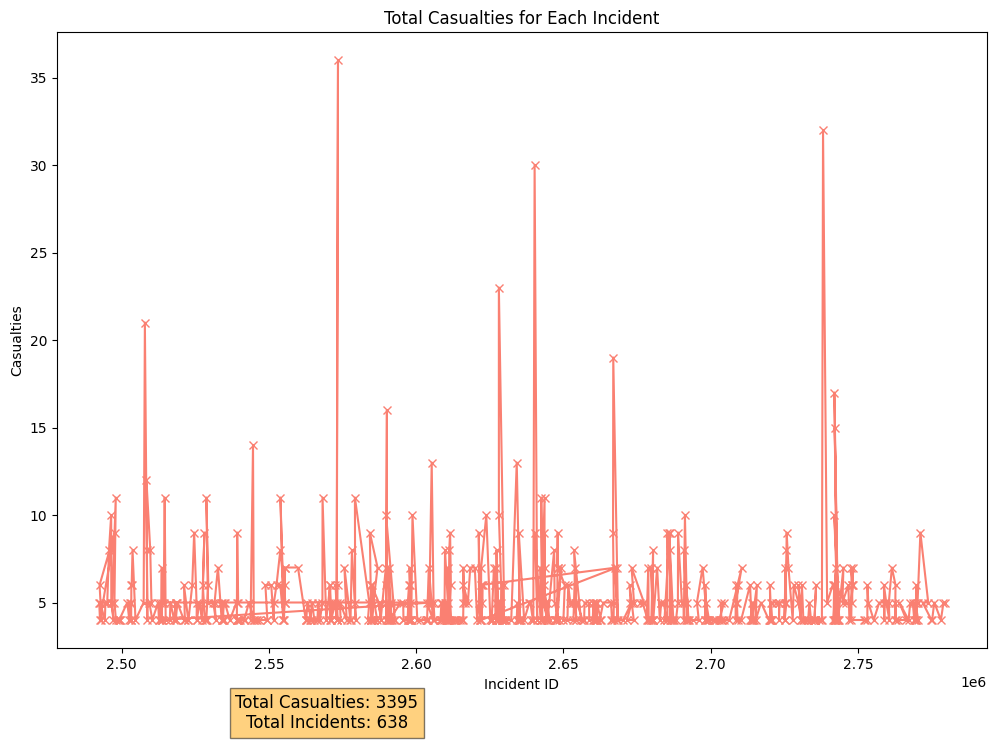

In [175]:
df['Total Casualties'] = (
    df['Victims Killed'] + 
    df['Victims Injured'] +
    df['Suspects Killed'] +
    df['Suspects Injured'])

df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df.sort_values(by='Incident Date', inplace=True)

plt.figure(figsize=(12, 8))
plt.plot(df['Incident ID'].astype(int), df['Total Casualties'], marker='x', color='salmon')
plt.title('Total Casualties for Each Incident')
plt.xlabel('Incident ID')
plt.ylabel('Casualties')

total_casualties = df['Total Casualties'].sum()
total_incidents = df['Incident ID'].nunique()
caption_text = f'Total Casualties: {total_casualties}\nTotal Incidents: {total_incidents}'
plt.figtext(0.35, 0.01, caption_text, ha='center', fontsize=12, bbox=dict(facecolor='orange', alpha=0.5))

plt.show()

In [193]:
# identify outliers for Victims Killed and Victims Injured

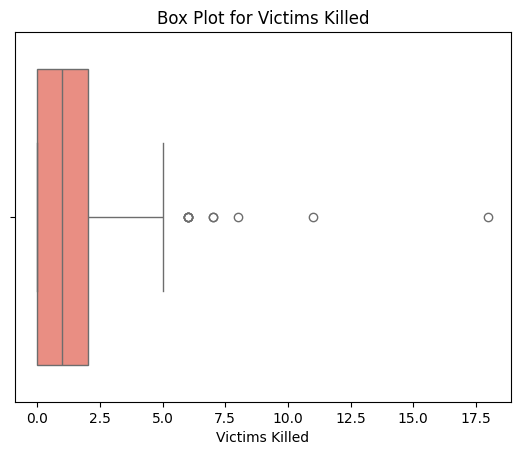

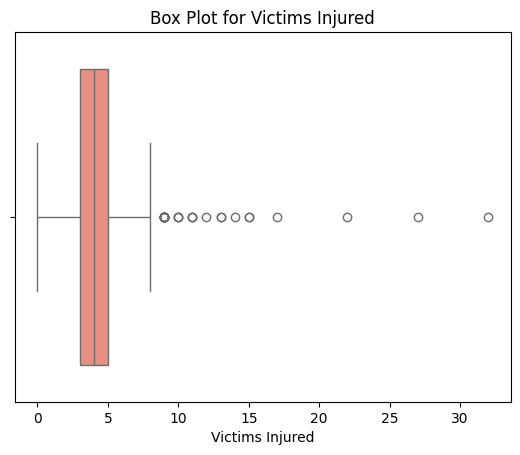

In [177]:
sns.boxplot(x=df['Victims Killed'], color='salmon')
plt.title('Box Plot for Victims Killed')
plt.show()

sns.boxplot(x=df['Victims Injured'], color='salmon')
plt.title('Box Plot for Victims Injured')
plt.show()

In [194]:
# histogram for Victims Killed

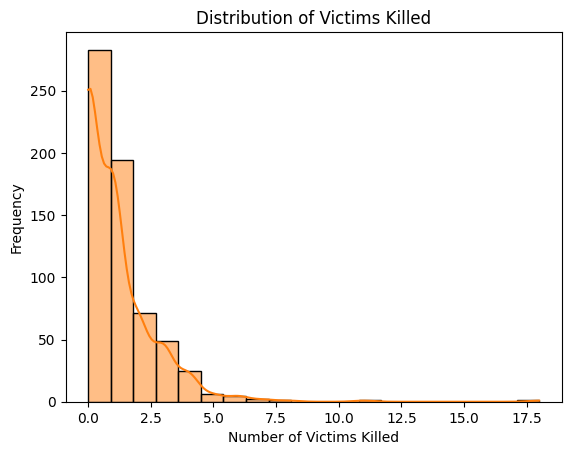

In [179]:
sns.histplot(df['Victims Killed'], bins=20, kde=True, color='tab:orange')
plt.title('Distribution of Victims Killed')
plt.xlabel('Number of Victims Killed')
plt.ylabel('Frequency')
plt.show()

In [181]:
# time-trend analysis

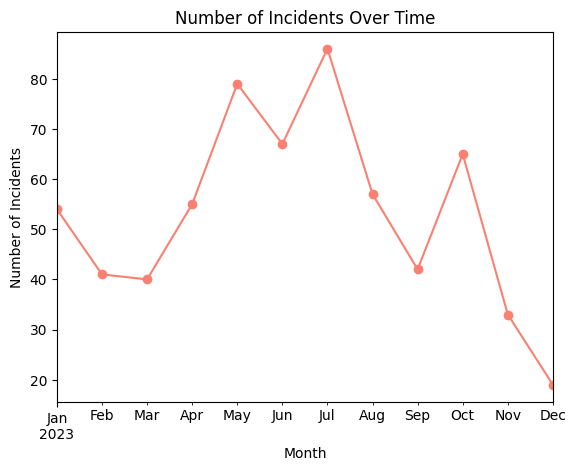

In [182]:
incidents_by_month = df.groupby(df['Incident Date'].dt.to_period("M")).size()
incidents_by_month.plot(kind='line', marker='o', color='salmon')
plt.title('Number of Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()

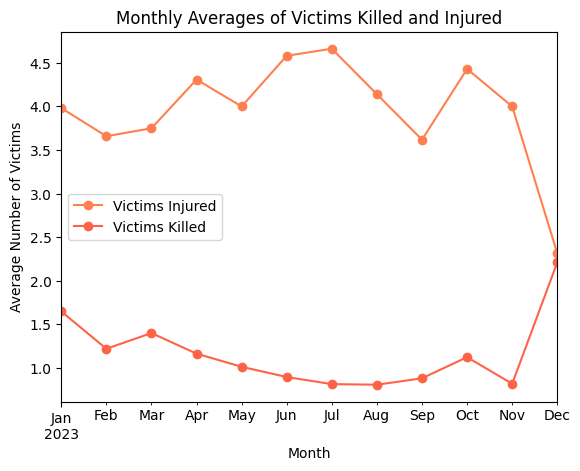

In [183]:
monthly_avg_victims = df.groupby(df['Incident Date'].dt.to_period("M")).agg({
    'Victims Injured': 'mean',
    'Victims Killed': 'mean'
})
monthly_avg_victims.plot(kind='line', marker='o', color=['coral','#FF6347'])
plt.title('Monthly Averages of Victims Killed and Injured')
plt.xlabel('Month')
plt.ylabel('Average Number of Victims')
plt.show()

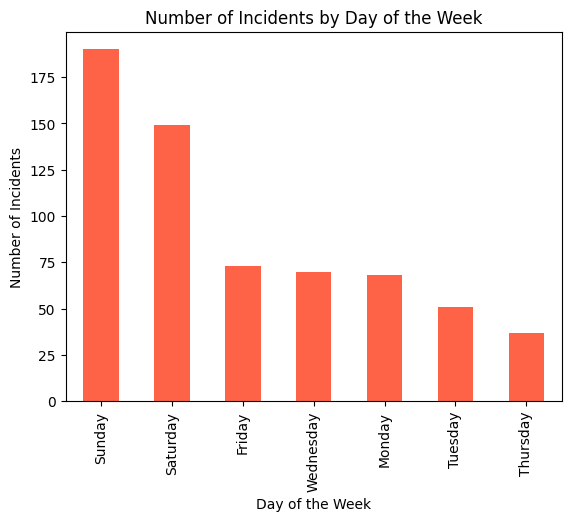

In [184]:
df['Day of Week'] = df['Incident Date'].dt.day_name()
incidents_by_day = df['Day of Week'].value_counts()
incidents_by_day.plot(kind='bar', color='#FF6347')
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

In [185]:
# create merged geodataframe with incident count from original df

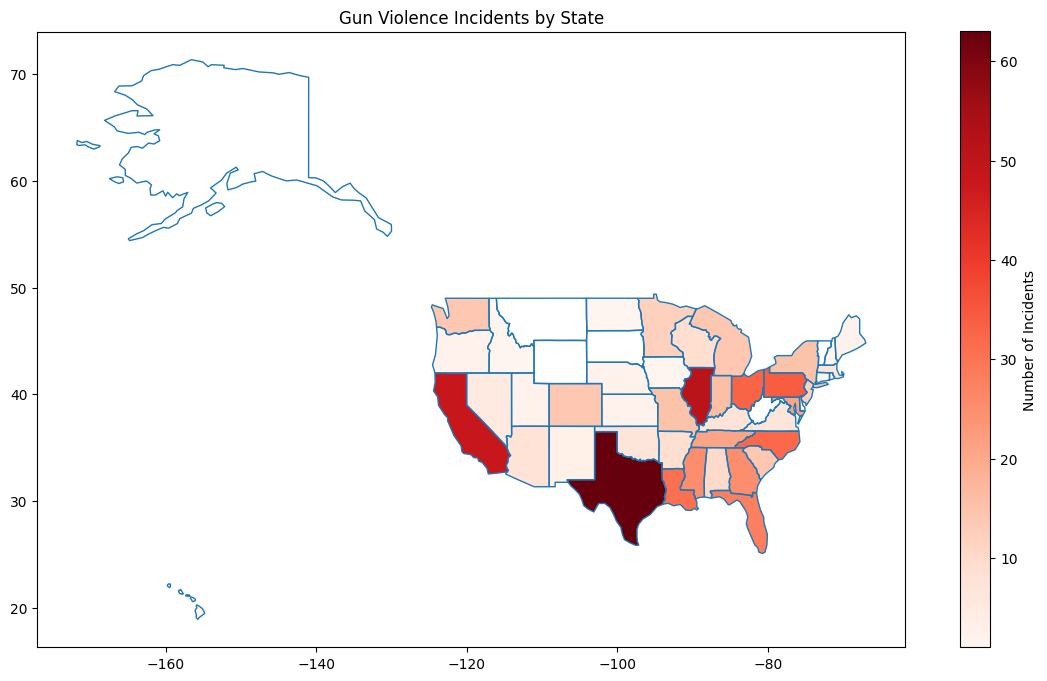

In [197]:
us_states = gpd.read_file(r"C:\Users\moham\Data-Analysis-Portfolio\Gun Violence\ne_110m_admin_1_states_provinces")
merged_df = us_states.merge(
    df.groupby('State').size().reset_index(name='Incident Count'),
    how='left',
    left_on='name',
    right_on='State')

fig, ax = plt.subplots(figsize=(14, 8))

us_states.boundary.plot(ax=ax, linewidth=1)
us_states.plot(ax=ax, color='white')
merged_df.plot(column='Incident Count', ax=ax, legend=True, legend_kwds={'label': "Number of Incidents"}, cmap='Reds')
plt.title('Gun Violence Incidents by State')
plt.show()

In [187]:
# countplot of incidents by state

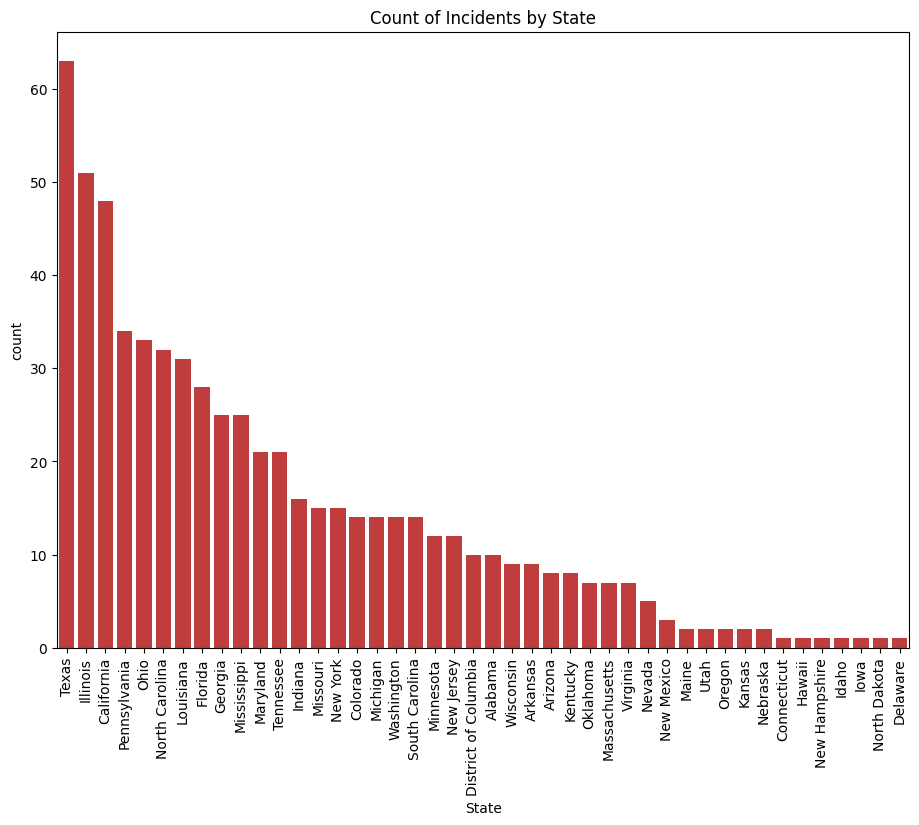

In [202]:
plt.figure(figsize=(11, 8))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index, color='tab:red')
plt.title('Count of Incidents by State')
plt.xticks(rotation=90)
plt.show()

In [189]:
# import scikit-learn libraries for correlation and regression analysis

In [190]:
from sklearn.model_selection import train_test_split  # Add this line
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [203]:
# predictive model for Suspects Arrested per Victims Injured

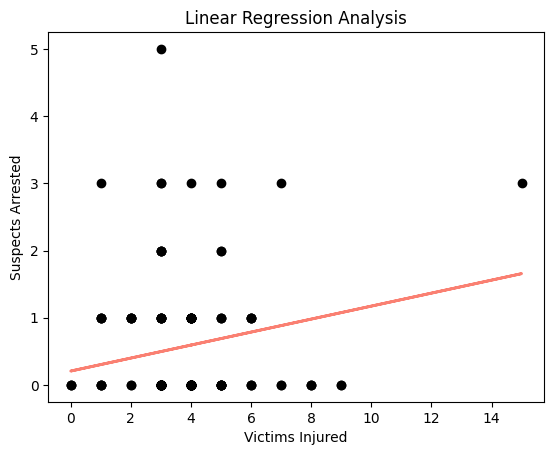

In [204]:
selected_columns = ['Victims Injured', 'Suspects Arrested']
selected_df = df[selected_columns].dropna()

X = selected_df['Victims Injured'].values.reshape(-1, 1)
y = selected_df['Suspects Arrested'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='salmon', linewidth=2)
plt.xlabel('Victims Injured')
plt.ylabel('Suspects Arrested')
plt.title('Linear Regression Analysis')
plt.show()